# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
# %pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-01-06 15:29:56.026436: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 15:29:56.037608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736173796.051080  356363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736173796.054651  356363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 15:29:56.067539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from helpers import plot

In [ ]:
repo = DataRepository()
repo.load_relativePaths_of_videos_with_framelabels()
repo.VideoNames.head()
# repo.VideoNames.iloc[0]["name"]

connection established


,folderId,id,name
id,,,
651,3,651,competition/belgium/DD3/2023-PK-ZA-10-3DD-Stef...
669,3,669,competition/belgium/DD3/2023-PK-ZA-4.mp4
680,3,680,competition/belgium/DD3/2023-PK-ZO-2.mp4
644,3,644,competition/belgium/DD3/2023-PK-ZO-9.mp4
2,3,2,competition/belgium/DD3/bk-handles-dd3-2024-ju...


In [6]:
frameloader = FrameLoader(repo)

In [7]:
f, _ = frameloader.get_frame(103, 66, dim=512, original_x=0.5, original_y=0.5, original_width=0.5, original_height=0.5)
f

0.5 0.5 0.5 0.5


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

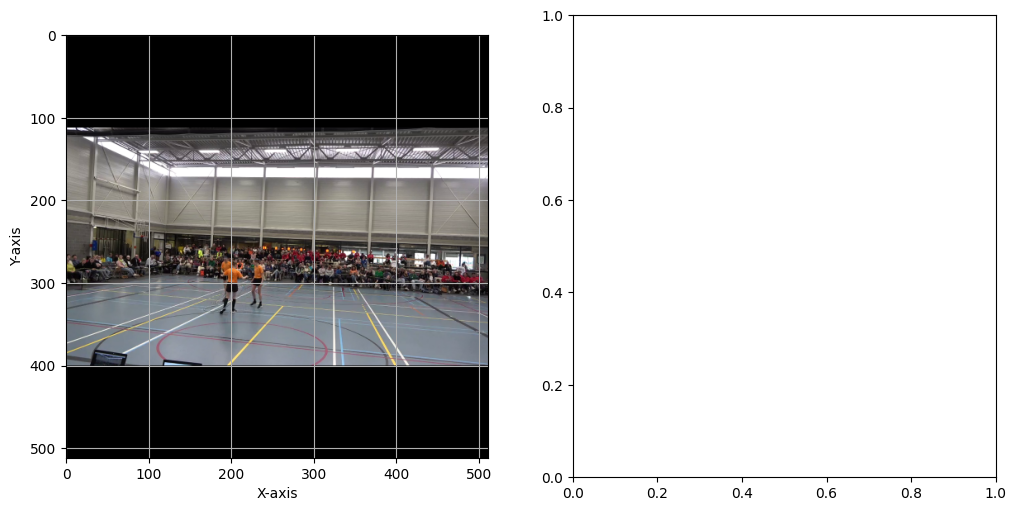

In [8]:
plot([f])

In [9]:
repo.VideoNames.head()

,folderId,id,name
id,,,
651,3,651,competition/belgium/DD3/2023-PK-ZA-10-3DD-Stef...
669,3,669,competition/belgium/DD3/2023-PK-ZA-4.mp4
680,3,680,competition/belgium/DD3/2023-PK-ZO-2.mp4
644,3,644,competition/belgium/DD3/2023-PK-ZO-9.mp4
2,3,2,competition/belgium/DD3/bk-handles-dd3-2024-ju...


In [10]:
repo.VideoNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 651 to 142
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   folderId  63 non-null     int64 
 1   id        63 non-null     int64 
 2   name      63 non-null     object
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [11]:
repo.VideoNames.loc[581]["name"]

'competition/belgium/DD3/bk-handles-dd3-2024-senioren-mixed-z1.mp4'

In [12]:
from DataGeneratorFrames import DataGeneratorFrames

connection established
DataGeneratorSkillBorders init done
on_epoch_end_called
lengte is =  2
getitem 0
0.454286 0.567489 0.281633 0.435414
1620.0
0.306122 0.528302 0.339592 0.435414
852.0
0.149388 0.488389 0.29551 0.341074
225.0
0.822041 0.642961 0.174694 0.476052
3115.0
0.451837 0.576923 0.278367 0.416546
1235.0
0.473878 0.567489 0.299592 0.464441
1112.0
0.493469 0.560232 0.240816 0.380261
1961.0
0.79102 0.648766 0.212245 0.441219
2955.0


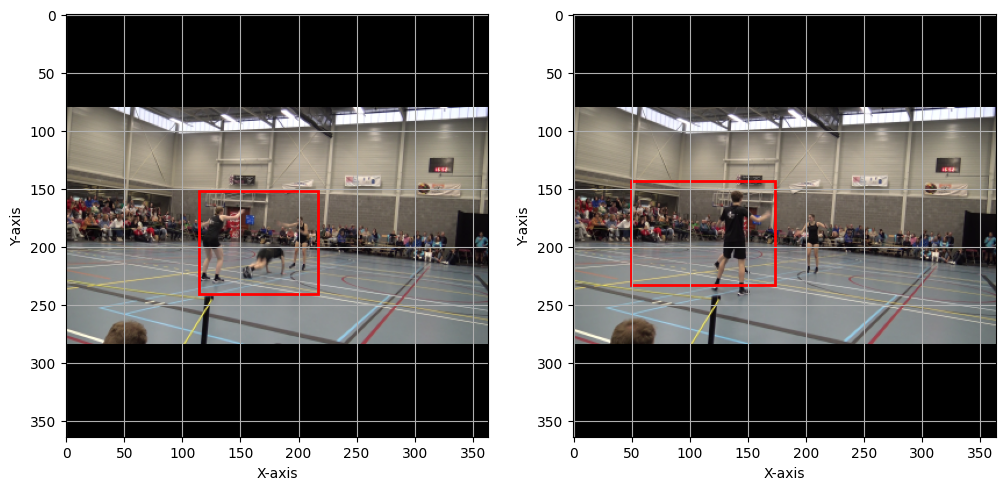

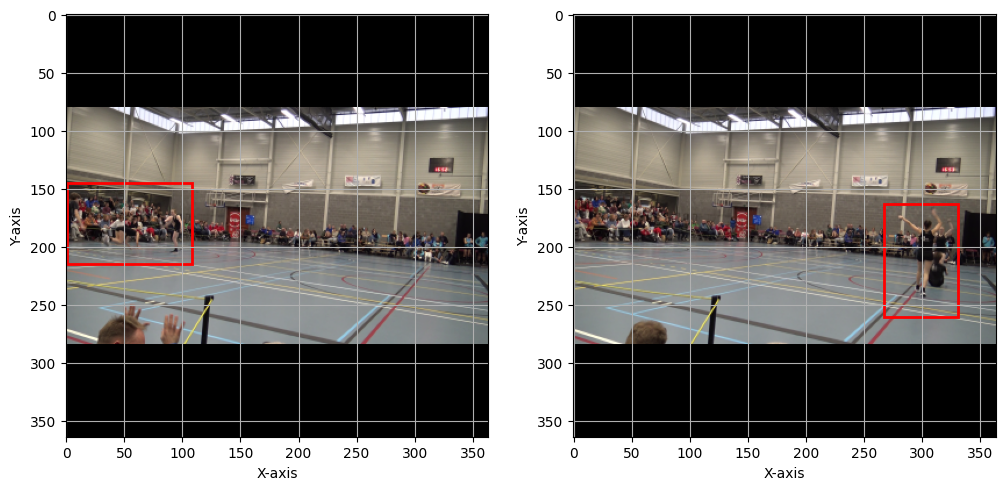

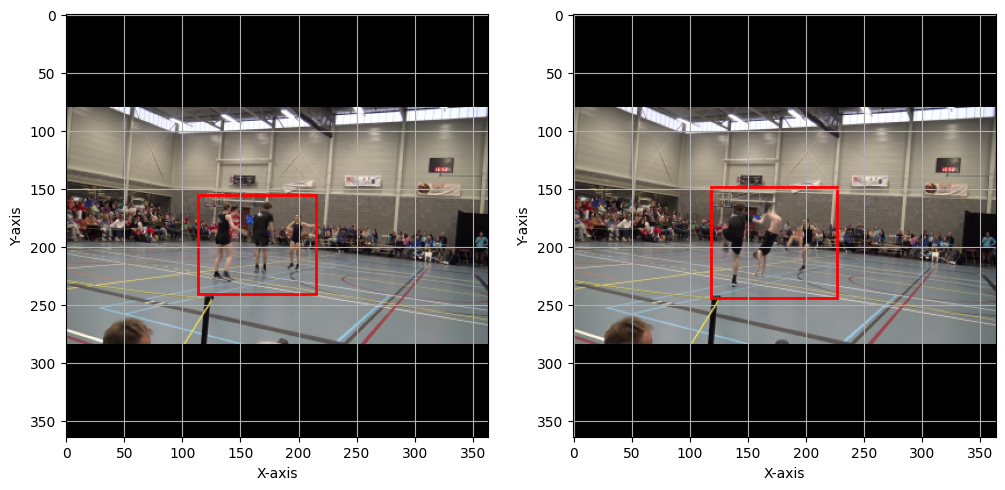

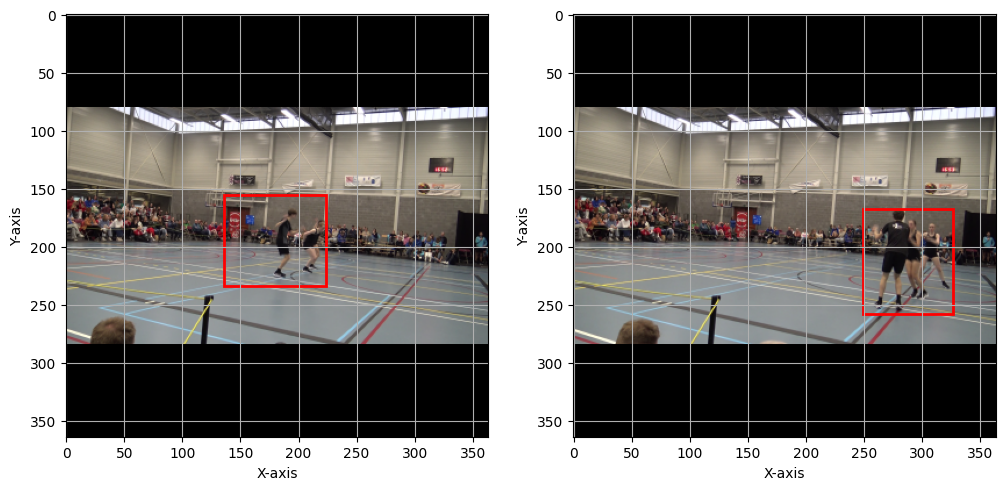

getitem 1
CPU times: user 6.93 s, sys: 228 ms, total: 7.16 s
Wall time: 2.56 s


In [13]:
%%time

train_gen = DataGeneratorFrames(
    frameloader=frameloader,
    train_test_val="train",
    dim=(364,364),
    batch_size=8
)

print("lengte is = ", train_gen.__len__())
for i in range(train_gen.__len__()):
    X, y = train_gen.__getitem__(i)
    for j in range(len(X)//2):
        plot(X[j*2:j*2+2], y[j*2:j*2+2])


In [14]:
X

array([], dtype=float64)